In [65]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier,GradientBoostingClassifier
import re, string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.metrics import accuracy_score
import os
import csv
import pytesseract
from pdf2image import convert_from_path 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

def preprocess(text):
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text)
    text=remove_stopwords(text)
    text=lemmatizing(text)
    return text

In [15]:
df=pd.read_csv(r'C:\Users\RJ\Downloads\output.csv')

In [ ]:
#Extrct text from scanned docs

# Define the folder containing scanned PDF documents
folder_path = r'C:\Users\RJ\Downloads\docs'  

# Create or open a CSV file to store the extracted text
csv_file_path =  r'C:\Users\RJ\Downloads\output.csv'

# Initialize a list to store the extracted text
extracted_text_list = []

# Loop through each PDF file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.pdf'):
        pdf_file_path = os.path.join(folder_path, filename)
        images = convert_from_path(pdf_file_path,poppler_path = r'C:\Users\RJ\Downloads\Release-23.11.0-0\poppler-23.11.0\Library\bin')
        extracted_text = ""

# Loop through each image and perform OCR
        for image in images:
            text = pytesseract.image_to_string(image)
            extracted_text += text
        cleaned_text=preprocess(extracted_text)   
        extracted_text_list.append([filename, cleaned_text,"Forms"])
        # Print or save the extracted text
        print(cleaned_text)
        

# Write the extracted text to a CSV file
with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Filename", "Extracted Text","Category"])
    csv_writer.writerows(extracted_text_list)

print(f"Text extracted from {len(extracted_text_list)} PDF documents and saved to {csv_file_path}")


Used Pytesseract to extract the text from scanned pdf documents.Above the the code to do the same

In [16]:
df

,Extracted Text,Category
0,qy fe form united state security exchange comm...,Forms
1,form united state omb approval security exchan...,Forms
2,form united state omb approval security exchan...,Forms
3,sea security exchange commission te eee merial...,Forms
4,warex form omb approval omb number united stat...,Forms
...,...,...
234,japanese smoking etiquette,Others
235,would think half century would enough time com...,Others
236,find answer perhaps itãââs better begin year o...,Others
237,situation blamed hearing negative thing onesel...,NaN


Others    127
Forms     101
Name: Category, dtype: int64


C:\Users\RJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Category'>

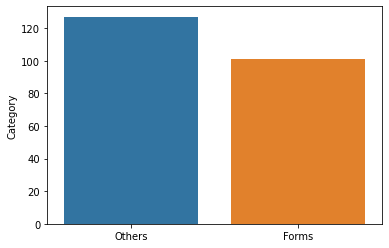

In [18]:
#Visualizing the data and correspond class count
x=df['Category'].value_counts()
print(x)
sns.barplot(x.index,x)

In [19]:
#Checking for null values
df.isna().sum()
df=df.dropna()

In [21]:
 #Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding
df['encoded_class'] = label_encoder.fit_transform(df['Category'])

# Display the encoded dataset
print(df)

                                        Extracted Text Category  encoded_class
0    qy fe form united state security exchange comm...    Forms              0
1    form united state omb approval security exchan...    Forms              0
2    form united state omb approval security exchan...    Forms              0
3    sea security exchange commission te eee merial...    Forms              0
4    warex form omb approval omb number united stat...    Forms              0
..                                                 ...      ...            ...
232  meditate impact illness life realize better gr...   Others              1
233  white house repeatedly chosen denial men many ...   Others              1
234                         japanese smoking etiquette   Others              1
235  would think half century would enough time com...   Others              1
236  find answer perhaps itãââs better begin year o...   Others              1

[228 rows x 3 columns]


C:\Users\RJ\AppData\Local\Temp/ipykernel_6012/2199027553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_class'] = label_encoder.fit_transform(df['Category'])


In [24]:
df.dtypes

Extracted Text    object
Category          object
encoded_class      int32
dtype: object

In [25]:
df

,Extracted Text,Category,encoded_class
0,qy fe form united state security exchange comm...,Forms,0
1,form united state omb approval security exchan...,Forms,0
2,form united state omb approval security exchan...,Forms,0
3,sea security exchange commission te eee merial...,Forms,0
4,warex form omb approval omb number united stat...,Forms,0
...,...,...,...
232,meditate impact illness life realize better gr...,Others,1
233,white house repeatedly chosen denial men many ...,Others,1
234,japanese smoking etiquette,Others,1
235,would think half century would enough time com...,Others,1


In [51]:
def get_top_classes(test_data,classifier):
    test_data=preprocess(test_data)
    test_data=remove_extra_white_spaces(test_data)
    test_data=remove_stopwords(test_data)
    test_data=lemmatizing(test_data)
    tf=tfidf_vectorizer.transform([test_data])
    classifier.predict(tf)
    y_pred_proba = classifier.predict_proba(tf)
    class_labels = label_encoder.classes_
    class_probabilities = [list(zip(class_labels, probs)) for probs in y_pred_proba]
    top_classes = [sorted(probs, key=lambda x: x[1], reverse=True)[:3] for probs in class_probabilities]
    return ("Top classes:"+str(top_classes))


In [52]:
#Vectorising the text data and Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['Extracted Text'], df['encoded_class'].values, test_size=0.30)
# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer.fit(df['Extracted Text'])
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [53]:
#Aaproach 1:Tried RandomForest Classifier

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        38

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

1.0


In [54]:
text = "ONGC, Eicher Motors, Hindalco Industries, Maruti Suzuki and Dr Reddy's Laboratories were among the top losers on the Nifty. The gainers included Titan Company, Bajaj Finance, L&T, Bajaj Finserv and Adani Ports"
get_top_classes(text,clf)

"Top classes:[[('Others', 0.98), ('Forms', 0.02)]]"

In [55]:
text ="Physicists Pierre Agostini, Ferenc Krausz and Anne L’Huillier will split the 11 million Swedish kronor (about $1 million) prize, awarded for experimental methods that generate attosecond pulses of light for the study of electron dynamics in matter."
get_top_classes(text,clf)

"Top classes:[[('Others', 1.0), ('Forms', 0.0)]]"

In [56]:
#Aaproach 2:Tried Ensemble technique by using ramdomforest,adaboot and voting classifier

from sklearn.metrics import classification_report, accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Create a VotingClassifier ensemble
ensemble = VotingClassifier(estimators=[('rf', random_forest), ('adaboost', adaboost)], voting='soft')

# Train the ensemble on the training data
ensemble.fit(X_train_tfidf, y_train)

# Evaluate the ensemble on the test set
y_pred = ensemble.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        38

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



## Predicting on data from various online sources

In [59]:
text = "ONGC, Eicher Motors, Hindalco Industries, Maruti Suzuki and Dr Reddy's Laboratories were among the top losers on the Nifty. The gainers included Titan Company, Bajaj Finance, L&T, Bajaj Finserv and Adani Ports"
get_top_three_classes(text,ensemble)

"Top three classes:[[('Others', 0.9899998700665116), ('Forms', 0.01000012993348843)]]"

In [66]:
text="A global study involving 30,000 individuals from India has found a strong link between frequent consumption of ultra-processed foods (UPFs) and decreased mental wellbeing. The study revealed that those who consumed UPFs several times a day were nearly three times more likely to struggle with their mental health compared to those who rarely or never consumed these foods."
get_top_classes(text,ensemble)

"Top classes:[[('Others', 0.9949998700665116), ('Forms', 0.005000129933488431)]]"

In [67]:
text="I am so happy that I cannot express my happiness in words.Feels like all my dreams are coming true"
get_top_classes(text,ensemble)

"Top classes:[[('Others', 0.9949998700665116), ('Forms', 0.005000129933488431)]]"

In [58]:
#Approach 3:Tried stacking different classifiers as base models andfinal estimator as Logistic regression
# Define multiple base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Create a Stacking Classifier with a meta-classifier (e.g., Logistic Regression)
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(class_weight='balanced'))

# Train the model
stacking_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_stacking = stacking_classifier.predict(X_test_tfidf)

# Evaluate the Stacking model
print(classification_report(y_test, y_pred_stacking))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        38

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

